# SARIMA Model Creation


In [1]:
# Libraries
#

import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller, pacf, pacf_ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

import pmdarima as pm

import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from pandas.plotting import lag_plot

In [2]:
# Function for  Residuals Analysis

def model_residuals_analysis(model):

    print(f'Residuals Analysis for Model:')
    print(model_sarima_manual.summary())

    residuals = model.resid

    # Residuals Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(residuals)
    ax1.set_title('Residuals for the (S)ARIMA(X) Model', fontsize=14)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Residuals', fontsize=12)
    plt.show()
    
    # ACF Plot
    lag_value = 30
    fig, ax1 = plt.subplots(figsize=(12, 6))
    plot_acf(residuals, lags=lag_value, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF) of Residuals', fontsize=14)
    ax1.set_xlabel('Lag', fontsize=12)
    ax1.set_ylabel('ACF', fontsize=12)
    plt.show()

    # PACF Plot
    lag_value = 30
    fig, ax1 = plt.subplots(figsize=(12, 6))
    plot_pacf(residuals, lags=lag_value, ax=ax1)
    ax1.set_title('PACF of Residuals', fontsize=14)
    ax1.set_xlabel('Lags', fontsize=12)
    ax1.set_ylabel('PACF', fontsize=12)
    plt.show()

    # Q-Q Plot
    sm.qqplot(residuals, line='45')
    plt.show()

    # Durbin Watson Statistic
    dw_stat = durbin_watson(residuals)
    print(f'Durbin-Watson statistic of residuals: {dw_stat}')

In [ ]:
#%store -r model_sarima_manual
#model_residuals_analysis(model_sarima_manual)

## SARIMA Model Factors - Auto ARIMA

- Save in SARIMA_Auto

## SARIMA Model Factors - Manually

- Save in SARIMA_Manual

In [3]:
# Get the separately created training dataset for SARIMA model creation
%store -r training_data


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09053D+00    |proj g|=  3.35018D-01

At iterate    5    f=  3.94459D+00    |proj g|=  1.01366D-01

At iterate   10    f=  3.88055D+00    |proj g|=  8.90536D-02

At iterate   15    f=  3.85460D+00    |proj g|=  5.44761D-02

At iterate   20    f=  3.85114D+00    |proj g|=  5.44608D-04

At iterate   25    f=  3.85024D+00    |proj g|=  2.92939D-02

At iterate   30    f=  3.84914D+00    |proj g|=  1.15114D-03

At iterate   35    f=  3.84913D+00    |proj g|=  1.15783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

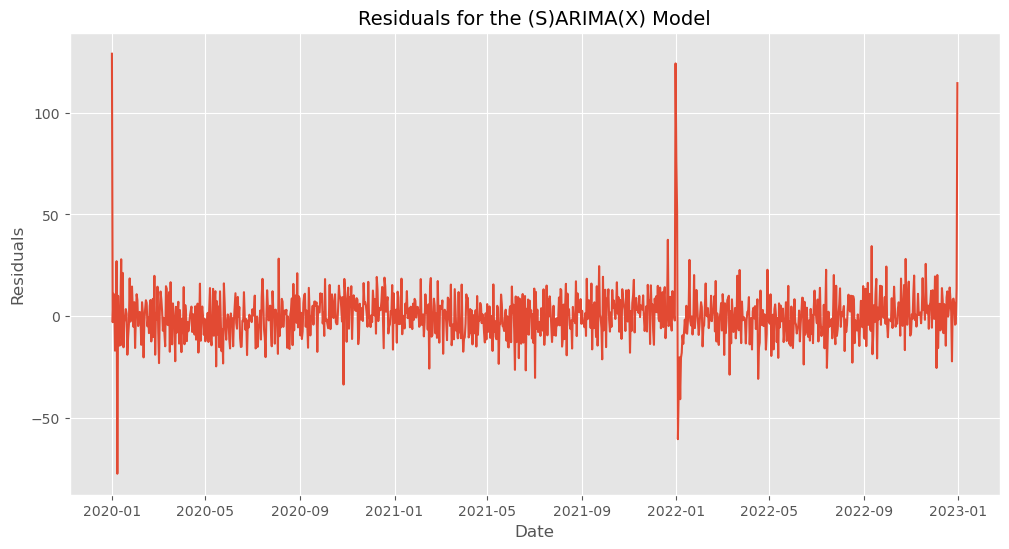

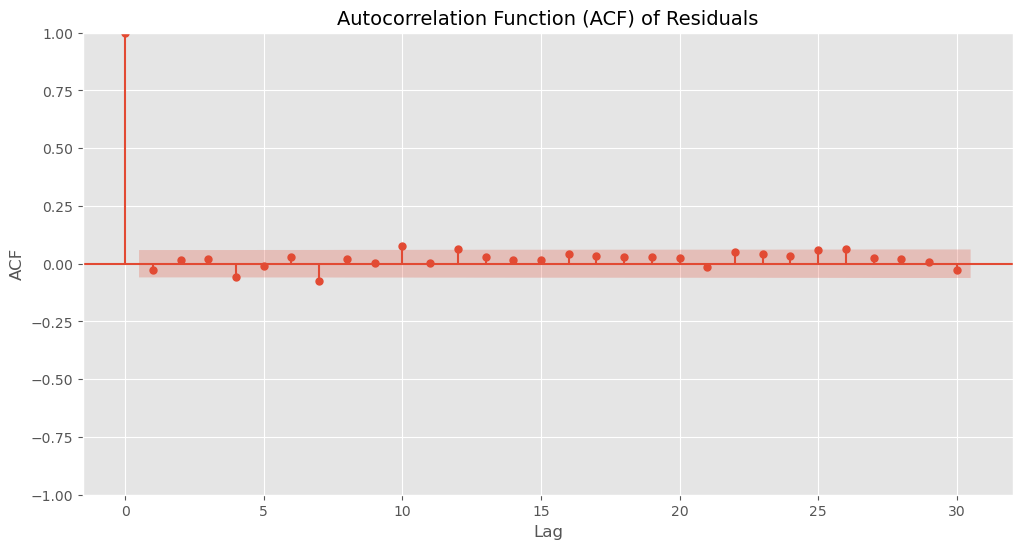

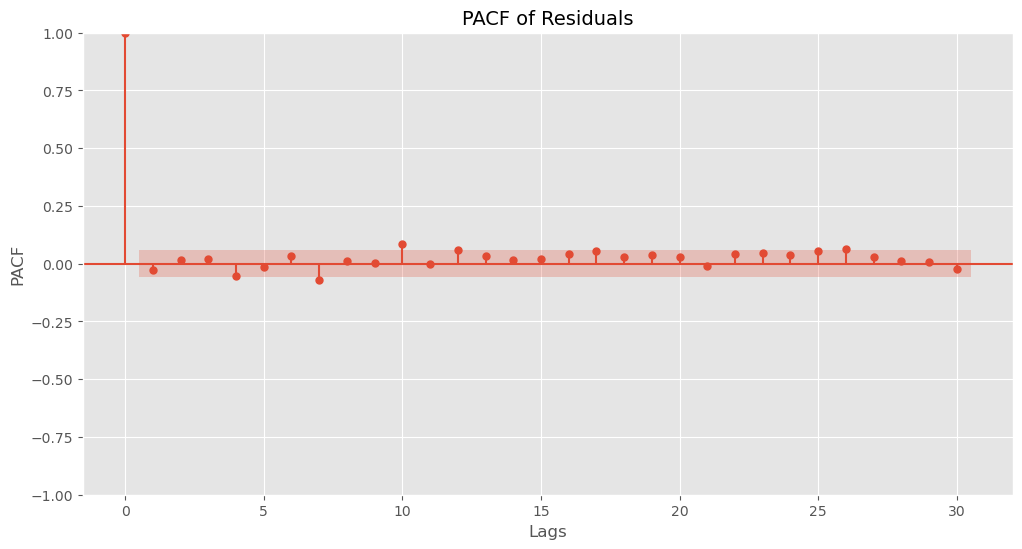

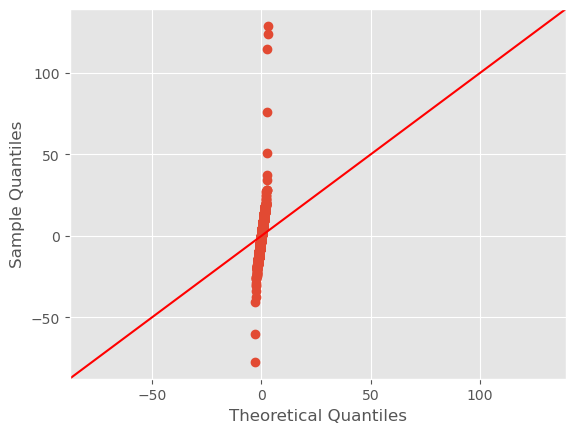

Durbin-Watson statistic of residuals: 1.8799901652613042
Stored 'model_sarima_manual' (SARIMAXResultsWrapper)


In [4]:
# Define the SARIMA Model - Manually

# Earlier suggests: p=3, d=1, q=60
# order(p, d, q)
p = 3
d = 1
q = 1
# seasonal order (P, D, Q) + m
P = 1
D = 1
Q = 1
m = 7

#model_sarima = sm.tsa.SARIMAX(training_data, order=(p,d,q), seasonal_order=(P,D,Q,m))
model_sarima_initial = SARIMAX(training_data, order=(p,d,q), seasonal_order=(P,D,Q,m))
model_sarima_manual = model_sarima_initial.fit()

# Show the summary of results & Residuals
model_residuals_analysis(model_sarima_manual)
#print(model_sarima_manual.summary())

# Store the model
%store model_sarima_manual

In [ ]:
test = pm.auto_arima(
    training_data, 
    d=1, D=1,
    m=7,                  # Number of observations per seasonal cycle, here daily for a year
    seasonal=True, sp=7,    # Seasonal and daily seasonal cycle
    trace=True
)

print(test.summary())

In [ ]:
# Determine the SARIMA Model - Using Auto Arima

auto_model = pm.auto_arima(
    training_data,           
    start_p=0, max_p=3,         # Range for AR order
    d=1,                        # Differencing order (can be set to None to auto-detect)
    start_q=0, max_q=60,        # Range for MA order
    start_P=0, max_P=3,         # Range for seasonal AR order
    D=1,                        # Seasonal differencing order (can be set to None to auto-detect)
    start_Q=0, max_Q=60,        # Range for seasonal MA order
    m=7,                       # Seasonal cycle length 365 for annual, with daily steps
    seasonal=True,              # Enable seasonality
    stepwise=True,              # Enable stepwise search to reduce computation
    trace=True,                 # Print model details during the search
    information_criterion='aic' # Criterion for model selection
)

print(auto_model.summary())